In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [4]:
titanic_csv = '../DATA/titanic_train.csv'
titanic = pd.read_csv('C:/Users/Perrine Mignot/Downloads/titanic.csv')

Exploring data

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

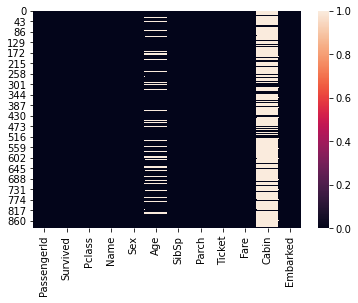

In [7]:
sns.heatmap(titanic.isnull())

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
         return Age

In [9]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

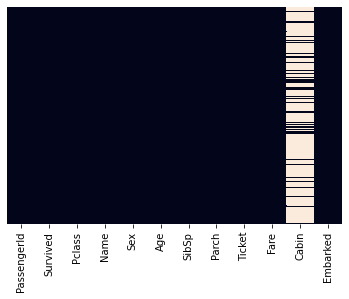

In [10]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [11]:
# Great! Let’s go ahead and drop the Cabin column.

In [12]:
titanic.drop('Cabin',axis=1,inplace=True)

Converting Categorical Features

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Here, we are adding hot encoding values for the sex and embark columns. After hot encoding, we will drop the rest of the columns which are not needed. (sex and embarked aren't needed as they are the original ones)

In [15]:
def one_hotencode(data, col):
    onehotencoder = OneHotEncoder()
    X = onehotencoder.fit_transform(data[col].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [col+'_'+str(int(i)) for i in range(X.shape[1])])
    df = pd.concat([data, dfOneHot], axis=1)
    f= df.drop([col], axis=1)
    return f

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We will concatenate the new sex and embarked columns to the dataframe.

Test Train Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), titanic['Survived'], test_size=0.30)                

Training and Predicting

In [18]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

ValueError: could not convert string to float: 'C'

Evaluation

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

NameError: name 'predictions' is not defined

In [20]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_titanic = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_titanic.loc[i] = [x_var_names[i], vif]
    return vif_titanic.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=titanic.drop(['Survived'],axis=1)
calculate_vif(titanic)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
titanic.drop(['S','female'],axis=1,inplace=True)
X=titanic.drop(['Survived'],axis=1)
calculate_vif(titanic)